In [1]:
from cavity import *

import ipywidgets as widgets
from ipywidgets import Layout, interact, FloatSlider

%matplotlib inline

C:\tools\Manim\Lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def f(elev=44, azim=250):
    mirror = CurvedMirror(radius=1,
                          outwards_normal=np.array([1, 0, 0]),
                          origin=np.array([0, 0, 0]))
    y = np.array([-0.2, 0, 0.2])
    z = np.array([-0.2, 0, 0.2])
    Y, Z = np.meshgrid(y, z)
    X = np.zeros_like(Y)
    origin = np.stack([X, Y, Z], axis=-1)
    k_vector = np.array([1, 0, 0])
    ray = Ray(origin=origin, k_vector=k_vector)
    reflected_ray = mirror.reflect_ray(ray)
    mirror.plot()
    ax = plt.gca()
    ray.plot(ax)
    reflected_ray.plot(ax)
    ax.view_init(elev=elev, azim=azim)
    plt.show()
    

widgets.interact(f, elev=(0, 180, 1), azim=(0, 360, 1));

interactive(children=(IntSlider(value=44, description='elev', max=180), IntSlider(value=250, description='azim…

In [2]:
def f(x_1=0, y_1=0, r_1=0, t_1 = 0, p_1 = 0,
      x_2=0, y_2=0, r_2=0, t_2 = 0, p_2 = 0,
      x_3=0, y_3=0, r_3=0, t_3 = 0, p_3 = 0,
      t_ray=0, theta_ray=0, p_ray=0, phi_ray=0,
      elev=38, azim=192, axis_span=0, center_on_ray_beginning=True):
    
    # print(f"{x_1=:.2f}\n{y_1=:.2f}\n{t_1=:.2f}\n{p_1=:.2f}\n{x_2=:.2f}\n{y_2=:.2f}\n{t_2=:.2f}\n{p_2=:.2f}\n{x_3=:.2f}\n{y_3=:.2f}\n{t_3=:.2f}\n{p_3=:.2f}\n{t_ray=:.2f}\n{theta_ray=:.2f}\n{p_ray=:.2f}\n{phi_ray=:.2f}\n{elev=:.2f}\n{azim=:.2f}\n{axis_span=:.2f}\n{center_on_ray_beginning=}")
    
    x_1 += 1
    y_1 += 0.00
    t_1 += np.pi / 2
    p_1 += -np.pi / 6
    x_2 += 0
    y_2 += np.sqrt(3)
    t_2 += np.pi / 2
    p_2 += np.pi / 2
    x_3 += -1
    y_3 += 0
    t_3 += np.pi / 2
    p_3 += 7 * np.pi / 6

    normal_1 = unit_vector_of_angles(t_1, p_1)
    center_1 = np.array([x_1, y_1, 0])
    normal_2 = unit_vector_of_angles(t_2, p_2)
    center_2 = np.array([x_2, y_2, 0])
    normal_3 = unit_vector_of_angles(t_3, p_3)
    center_3 = np.array([x_3, y_3, 0])

    mirror_1 = FlatMirror(outwards_normal=normal_1, distance_from_origin=1)
    mirror_2 = FlatMirror(outwards_normal=normal_2, distance_from_origin=1)
    mirror_3 = FlatMirror(outwards_normal=normal_3, distance_from_origin=1)

    default_k_vector = normalize_vector(mirror_2.center_of_mirror - mirror_1.center_of_mirror)
    theta_0, phi_0 = angles_of_unit_vector(default_k_vector)
    theta_ray += theta_0
    phi_ray += phi_0
    ray_k_vector = unit_vector_of_angles(theta_ray, phi_ray)
    ray_origin = mirror_1.parameterization(t_ray, p_ray)
    initial_ray = Ray(origin=ray_origin, k_vector=ray_k_vector)

    cavity = Cavity([mirror_1, mirror_2, mirror_3])

    central_line = cavity.trace_ray(initial_ray, cavity.get_initial_surface())

    output_parameters = cavity.trace_ray_parametric(np.array([t_ray, theta_ray, p_ray, phi_ray])) - np.array(
        [0, theta_0, 0, phi_0])
    # print(output_parameters)
    ax = cavity.plot(center_on_ray_beginning=center_on_ray_beginning, axis_span=axis_span)
    ax.view_init(elev=elev, azim=azim)
    plt.show()
    
    
    
    
    

x_min = -0.05
x_max = 0.05
r_min = -0.19
r_max = 0.19
dx = 0.0001
dt_max = 200
dtheta_max = 100

widgets.interact(f,
                 x_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_1=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_2=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_3=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 theta_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='theta_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 phi_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='phi_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 elev=FloatSlider(value=38, min=0, max=90, step=1, description='elevation', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 azim=FloatSlider(value=168, min=0, max=360, step=1, description='azimuth', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 axis_span=FloatSlider(value=1, min=0.01, max=10, step=0.01, description='axis span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 center_on_ray_beginning=widgets.Checkbox(value=True, description='center on ray beginning', disabled=False),
                 );

interactive(children=(FloatSlider(value=0.0, description='x_1', layout=Layout(width='2000px'), max=0.05, min=-…

interactive(children=(FloatSlider(value=0.0, description='x_1', layout=Layout(width='2000px'), max=0.05, min=-…

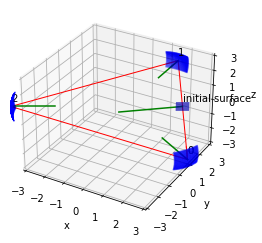

In [4]:
def f(x_1=0, y_1=0, r_1=0, t_1 = 0, p_1 = 0,
      x_2=0, y_2=0, r_2=0, t_2 = 0, p_2 = 0,
      x_3=0, y_3=0, r_3=0, t_3 = 0, p_3 = 0,
      t_ray=0, theta_ray=0, p_ray=0, phi_ray=0,
      elev=38, azim=192, axis_span=0, center_on_ray_beginning=True):
    
    x_1 += 1
    y_1 += 0.00
    r_1 += 2
    t_1 += np.pi / 2
    p_1 += -np.pi / 6
    x_2 += 0
    y_2 += np.sqrt(3)
    r_2 += 2
    t_2 += np.pi / 2
    p_2 += np.pi / 2
    x_3 += -1
    y_3 += 0
    r_3 += 2
    t_3 += np.pi / 2
    p_3 += 7 * np.pi / 6
    
    
    normal_1 = unit_vector_of_angles(t_1, p_1)
    center_1 = np.array([x_1, y_1, 0])
    normal_2 = unit_vector_of_angles(t_2, p_2)
    center_2 = np.array([x_2, y_2, 0])
    normal_3 = unit_vector_of_angles(t_3, p_3)
    center_3 = np.array([x_3, y_3, 0])

    mirror_1 = CurvedMirror(radius=2, outwards_normal=normal_1, center_of_mirror=center_1)
    mirror_2 = CurvedMirror(radius=2, outwards_normal=normal_2, center_of_mirror=center_2)
    mirror_3 = CurvedMirror(radius=2, outwards_normal=normal_3, center_of_mirror=center_3)
    
    default_k_vector = normalize_vector(mirror_2.center_of_mirror - mirror_1.center_of_mirror)
    theta_0, phi_0 = angles_of_unit_vector(default_k_vector)
    theta_ray += theta_0
    phi_ray += phi_0
    ray_k_vector = unit_vector_of_angles(theta_ray, phi_ray)
    ray_origin = mirror_1.parameterization(t_ray, p_ray)
    initial_ray = Ray(origin=ray_origin, k_vector=ray_k_vector)

    cavity = Cavity([mirror_1, mirror_2, mirror_3])

    central_line = cavity.trace_ray(initial_ray)
    
    output_parameters = cavity.trace_ray_parametric(np.array([t_ray, theta_ray, p_ray, phi_ray])) - np.array([0, theta_0, 0, phi_0])
    # print(output_parameters)
    ax = cavity.plot(center_on_ray_beginning=center_on_ray_beginning, axis_span=axis_span)
    
    ax.view_init(elev=elev, azim=azim)
    
    
    # print(f"{x_1=:.2f}\n{y_1=:.2f}\n{r_1=:.2f}\n{t_1=:.2f}\n{x_2=:.2f}\n{y_2=:.2f}\n{r_2=:.2f}\n{t_2=:.2f}\n{x_3=:.2f}\n{y_3=:.2f}\n{r_3=:.2f}\n{t_3=:.2f}")
    
    

x_min = -0.05
x_max = 0.05
r_min = -0.19
r_max = 0.19
dx = 0.0001
dt_max = 200
dtheta_max = 100

widgets.interact(f,
                 x_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_1=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_2=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_3=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 theta_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='theta_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 phi_ray=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='phi_ray', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 elev=FloatSlider(value=38, min=0, max=90, step=1, description='elevation', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 azim=FloatSlider(value=168, min=0, max=360, step=1, description='azimuth', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 axis_span=FloatSlider(value=1, min=0.01, max=10, step=0.01, description='axis span', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 center_on_ray_beginning=widgets.Checkbox(value=True, description='center on ray beginning', disabled=False),
                 );

In [2]:
def f(x_1=0, y_1=0, r_1=0, t_1 = 0, p_1 = 0,
      x_2=0, y_2=0, r_2=0, t_2 = 0, p_2 = 0,
      x_3=0, y_3=0, r_3=0, t_3 = 0, p_3 = 0,
      elev=38, azim=192, zoom=0, center_first_mirror=True):
    
    x_1 += 1
    y_1 += 0.00
    r_1 += 2
    t_1 += np.pi / 2
    p_1 += -np.pi / 6
    x_2 += 0
    y_2 += np.sqrt(3)
    r_2 += 2
    t_2 += np.pi / 2
    p_2 += np.pi / 2
    x_3 += -1
    y_3 += 0
    r_3 += 2
    t_3 += np.pi / 2
    p_3 += 7 * np.pi / 6
    
    
    normal_1 = unit_vector_of_angles(t_1, p_1)
    center_1 = np.array([x_1, y_1, 0])
    normal_2 = unit_vector_of_angles(t_2, p_2)
    center_2 = np.array([x_2, y_2, 0])
    normal_3 = unit_vector_of_angles(t_3, p_3)
    center_3 = np.array([x_3, y_3, 0])

    mirror_1 = CurvedMirror(radius=2, outwards_normal=normal_1, center_of_mirror=center_1)
    mirror_2 = CurvedMirror(radius=2, outwards_normal=normal_2, center_of_mirror=center_2)
    mirror_3 = CurvedMirror(radius=2, outwards_normal=normal_3, center_of_mirror=center_3)
    
    cavity = Cavity([mirror_1, mirror_2, mirror_3])

    central_line = cavity.find_central_line()
    
    cavity.plot()
    ax = plt.gca()
    if center_first_mirror:
        origin_camera = cavity.mirrors[0].center_of_mirror
    else:
        origin_camera = (cavity.mirrors[0].center_of_mirror + cavity.mirrors[1].center_of_mirror + cavity.mirrors[2].center_of_mirror) / 3
    ax.set_xlim(origin_camera[0] - zoom, origin_camera[0] + zoom)
    ax.set_ylim(origin_camera[1] - zoom, origin_camera[1] + zoom)
    ax.set_zlim(origin_camera[2] - zoom, origin_camera[2] + zoom)
    ax.view_init(elev=elev, azim=azim)
    
    
    # print(f"{x_1=:.2f}\n{y_1=:.2f}\n{r_1=:.2f}\n{t_1=:.2f}\n{x_2=:.2f}\n{y_2=:.2f}\n{r_2=:.2f}\n{t_2=:.2f}\n{x_3=:.2f}\n{y_3=:.2f}\n{r_3=:.2f}\n{t_3=:.2f}")
    
    

x_min = -0.05
x_max = 0.05
r_min = -0.19
r_max = 0.19
dx = 0.0001
dt_max = 200
dtheta_max = 100

widgets.interact(f,
                 x_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_1=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_1=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_1', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_2=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_2=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_2', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 x_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='x_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 y_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='y_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 r_3=FloatSlider(value=0, min=r_min, max=r_max, step=dx, description='r_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 t_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='t_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 p_3=FloatSlider(value=0, min=x_min, max=x_max, step=dx, description='p_3', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='2000px')),
                 elev=FloatSlider(value=38, min=0, max=90, step=1, description='elevation', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 azim=FloatSlider(value=168, min=0, max=360, step=1, description='azimuth', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 zoom=FloatSlider(value=1, min=0.01, max=10, step=0.01, description='zoom', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='.3e', layout=Layout(width='500px')),
                 center_first_mirror=widgets.Checkbox(value=True, description='center on first mirror', disabled=False),
                 );

interactive(children=(FloatSlider(value=0.0, description='x_1', layout=Layout(width='2000px'), max=0.05, min=-…